#### Code by Henrique Wegner

# Import libraries and autotime (to time the code).

In [2]:
%load_ext autotime

time: 0 ns (started: 2021-04-29 11:56:46 +01:00)


In [3]:
import pandas as pd
import numpy as np

time: 375 ms (started: 2021-04-29 11:56:47 +01:00)


# Import Datasets

In [4]:
blt_df = pd.read_csv('Data/blt_stops.csv')

time: 31 ms (started: 2021-04-29 11:56:47 +01:00)


In [5]:
blt_df.head()

,Stop_Id,Latitude,Longitude,Type
0,7000B6310001,54.296217,-7.871793,Bus Stop
1,700000004183,54.346455,-6.271543,Bus Stop
2,700000004149,54.346297,-6.271180,Bus Stop
3,7000B141561,54.193380,-7.567849,Bus Stop
4,7000B140871,54.193317,-7.567941,Bus Stop


time: 16 ms (started: 2021-04-29 11:56:47 +01:00)


In [6]:
schools_df = pd.read_csv('Data/schools_location.csv')

time: 16 ms (started: 2021-04-29 11:56:47 +01:00)


In [7]:
schools_df.head()

,Roll Number,schoolName,Principal Name,Ethos Description,Female,Male,Total,latitude,longitude,Type
0,00697S,ST BRIGIDS MXD N S,Denis Courtney,Catholic,447,502.0,949,53.375855,-6.361625,Primary School
1,00714P,LUCAN B N S,Dara Burke,Catholic,0,513.0,513,53.360019,-6.438876,Primary School
2,00729F,CLOCHAR LORETO N S,Sr. Maria Hyland,Catholic,501,0.0,501,53.295317,-6.282539,Primary School
3,00752A,CENTRAL SENIOR MXD N S,Deirdre Gartland,Catholic,133,143.0,276,53.349314,-6.257670,Primary School
4,01170G,S N NA H-AILLE,Edel McMahon,Catholic,67,72.0,139,53.579286,-6.299281,Primary School


time: 16 ms (started: 2021-04-29 11:56:47 +01:00)


In [8]:
garda_df = pd.read_csv('Data/garda_coords.csv')

time: 16 ms (started: 2021-04-29 11:56:47 +01:00)


In [9]:
garda_df.head()

,Unnamed: 0,Garda Station,Longitude,Latitude
0,0,Balbriggan Garda Station,-6.190980,53.614378
1,1,Ballyfermot Garda Station,-6.358053,53.344754
2,2,Ballymun Garda Station,-6.263922,53.394374
3,3,Blackrock Garda Station,-6.177503,53.299793
4,4,Blanchardstown Garda Station,-6.380952,53.389924


time: 0 ns (started: 2021-04-29 11:56:47 +01:00)


# Modify Datasets For Merge

- Modify Transports ID columns name.

In [10]:
blt_df = blt_df.rename({'Stop_Id':'ID'}, axis = 'columns')

time: 0 ns (started: 2021-04-29 11:56:47 +01:00)


- Drop schools_df columns that will not be used.

In [11]:
schools_df = schools_df.drop(columns=['schoolName', 'Principal Name', 'Ethos Description','Female','Male','Total'])

time: 16 ms (started: 2021-04-29 11:56:47 +01:00)


- Rename schools_df columns for merge.

In [12]:
schools_df = schools_df.rename({'Roll Number':'ID', 'latitude':'Latitude','longitude':'Longitude'}, axis = 'columns')

time: 0 ns (started: 2021-04-29 11:56:48 +01:00)


- Drop garda_df columns that will not be used.

In [13]:
garda_df = garda_df.drop(columns ='Unnamed: 0')

time: 0 ns (started: 2021-04-29 11:56:48 +01:00)


- Create an ID for the each garda station according to their name with hash.

In [14]:
garda_df['ID'] = garda_df[['Garda Station']].sum(axis=1).map(hash)

time: 0 ns (started: 2021-04-29 11:56:48 +01:00)


- Drop the Garda Station name column.

In [15]:
garda_df = garda_df.drop(columns='Garda Station')

time: 0 ns (started: 2021-04-29 11:56:49 +01:00)


- Create a Type column and set all rows to Garda Station.

In [16]:
garda_df['Type'] = "Garda Station"

time: 0 ns (started: 2021-04-29 11:56:49 +01:00)


# Merging Datasets

- Append all datasets to a new one, reset index and drop index.

In [17]:
blts_df = blt_df.append(schools_df)

time: 0 ns (started: 2021-04-29 11:56:49 +01:00)


In [18]:
blts_df = blts_df.append(garda_df)

time: 0 ns (started: 2021-04-29 11:56:49 +01:00)


- Reset the index.

In [19]:
blts_df = blts_df.reset_index()

time: 0 ns (started: 2021-04-29 11:56:50 +01:00)


- Drop old index column.

In [20]:
blts_df = blts_df.drop(columns='index')

time: 0 ns (started: 2021-04-29 11:56:50 +01:00)


In [21]:
blts_df

,ID,Latitude,Longitude,Type
0,7000B6310001,54.296217,-7.871793,Bus Stop
1,700000004183,54.346455,-6.271543,Bus Stop
2,700000004149,54.346297,-6.271180,Bus Stop
3,7000B141561,54.193380,-7.567849,Bus Stop
4,7000B140871,54.193317,-7.567941,Bus Stop
...,...,...,...,...
20913,-507329126053720695,53.350485,-6.251706,Garda Station
20914,8523066521057055750,53.330200,-6.298697,Garda Station
20915,-1633398297145224735,53.456024,-6.221112,Garda Station
20916,424426314260820661,53.286807,-6.367589,Garda Station


time: 15 ms (started: 2021-04-29 11:56:50 +01:00)


# Check With Scatterplot
- You can see all the outliers in the plot.

In [22]:
scatter_test = blts_df

time: 0 ns (started: 2021-04-29 11:56:51 +01:00)


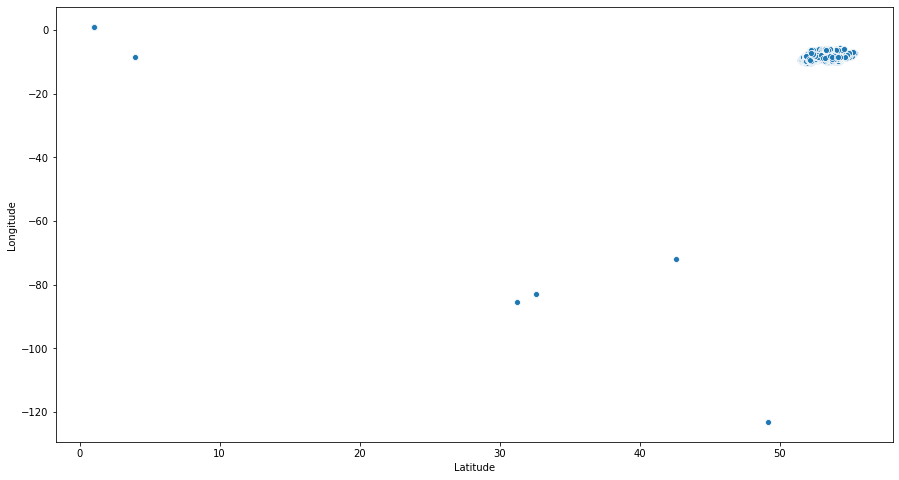

time: 875 ms (started: 2021-04-29 11:56:51 +01:00)


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(scatter_test["Latitude"], scatter_test["Longitude"])

# Export to csv

In [24]:
blts_df.to_csv ('Data\locations_df.csv', index = False, header=True)

time: 79 ms (started: 2021-04-29 11:56:53 +01:00)


___________________________________________________________________________________________________________________________

# Property Dataset
- Importing the dataset.

In [25]:
houses_df = pd.read_csv('Data/properties.csv')

time: 94 ms (started: 2021-04-29 11:56:55 +01:00)


In [26]:
houses_df

,Unnamed: 0,Date of Sale,Address,Postal Code,Price,Not Full Market Price,VAT Exclusive,Description of Property,Longitude,Latitude,Neighborhood
0,0,2017-01-01,"11 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
1,1,2017-01-01,"1 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
2,2,2017-01-01,"9 TEAL HOUSE, REDCOURT OAKS SEAFIELD RD EAST, ...",Dublin 3,66000.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.182833,53.362984,Clontarf
3,3,2017-01-01,"8 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EA...",Dublin 3,271800.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
4,4,2017-01-01,"5 SEAFIELD GROVE, CLONTARF, DUBLIN 3",Dublin 3,830000.0,No,No,Second-Hand Dwelling house /Apartment,-6.181892,53.365139,Clontarf
...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,2019-08-16,"73 CLANMAURICE RD, DONNYCARNEY, DUBLIN 5",Dublin 5,320000.0,No,No,Second-Hand Dwelling house /Apartment,-6.212927,53.376221,Clontarf West
46400,46400,2019-08-16,"8 ALEXANDRA COURT, DUNDRUM, DUBLIN 16",Dublin 14,285000.0,No,No,Second-Hand Dwelling house /Apartment,-6.246034,53.294678,Churchtown Lower
46401,46401,2019-08-16,"APT 1, 3 DERMOT ST, CLONGRIFFIN DUBLIN 13",Dublin 13,215000.0,No,No,Second-Hand Dwelling house /Apartment,-6.156979,53.403250,Donaghmede
46402,46402,2019-08-16,"APT 416, THE CUBES 8, BEACON SOUTH QUARTER DUB...",Dublin 18,365000.0,No,No,Second-Hand Dwelling house /Apartment,-6.215124,53.277574,Blackthorn


time: 15 ms (started: 2021-04-29 11:56:56 +01:00)


- Create an ID column with the index of the rows.

In [27]:
houses_df['ID'] = houses_df.index

time: 0 ns (started: 2021-04-29 11:56:57 +01:00)


- Drop columns that will not be used.

In [28]:
houses_df = houses_df.drop(columns=['Unnamed: 0', 'Address'])

time: 16 ms (started: 2021-04-29 11:56:58 +01:00)


In [29]:
houses_df

,Date of Sale,Postal Code,Price,Not Full Market Price,VAT Exclusive,Description of Property,Longitude,Latitude,Neighborhood,ID
0,2017-01-01,Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf,0
1,2017-01-01,Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf,1
2,2017-01-01,Dublin 3,66000.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.182833,53.362984,Clontarf,2
3,2017-01-01,Dublin 3,271800.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf,3
4,2017-01-01,Dublin 3,830000.0,No,No,Second-Hand Dwelling house /Apartment,-6.181892,53.365139,Clontarf,4
...,...,...,...,...,...,...,...,...,...,...
46399,2019-08-16,Dublin 5,320000.0,No,No,Second-Hand Dwelling house /Apartment,-6.212927,53.376221,Clontarf West,46399
46400,2019-08-16,Dublin 14,285000.0,No,No,Second-Hand Dwelling house /Apartment,-6.246034,53.294678,Churchtown Lower,46400
46401,2019-08-16,Dublin 13,215000.0,No,No,Second-Hand Dwelling house /Apartment,-6.156979,53.403250,Donaghmede,46401
46402,2019-08-16,Dublin 18,365000.0,No,No,Second-Hand Dwelling house /Apartment,-6.215124,53.277574,Blackthorn,46402


time: 16 ms (started: 2021-04-29 11:56:59 +01:00)


- Drop columns that will not be used for now.

In [78]:
houses_df_test = houses_df.drop(columns=['Date of Sale', 'Price','VAT Exclusive', 'Not Full Market Price','Description of Property'])

time: 0 ns (started: 2021-04-25 19:35:53 +01:00)


- Choose just the right columns.

In [79]:
houses_df_test = houses_df_test[['ID','Latitude','Longitude']]

time: 16 ms (started: 2021-04-25 19:35:54 +01:00)


__________________________________________________

# Reduce the points to only Dublin.

Calculates a circle between two points and delete any entries that are not in this area.

Reference: https://stackoverflow.com/questions/42686300/how-to-check-if-coordinate-inside-certain-area-python

In [102]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

center_point = [{'lat': 53.385574, 'lng': -6.280166}]


lat1 = center_point[0]['lat']
lon1 = center_point[0]['lng']

radius = 30.00

for label1, row1 in blts_df.iterrows():
    
    test_point = [{'lat': row1['Latitude'], 'lng': row1['Longitude']}]
    
    lat2 = test_point[0]['lat']
    lon2 = test_point[0]['lng']
    
    a = haversine(lon1, lat1, lon2, lat2)
    
    if a <= radius:
        pass
    else:
        blts_df = blts_df.drop(label1)
        

time: 13.9 s (started: 2021-04-25 19:41:50 +01:00)


Reduced from 20k entries to 7k.

In [103]:
blts_df

,ID,Latitude,Longitude,Type
145,8220DB001738,53.363451,-6.223914,Bus Stop
146,8220DB007516,53.402076,-6.171727,Bus Stop
147,8220DB000592,53.382733,-6.148383,Bus Stop
148,8220DB001228,53.392429,-6.218513,Bus Stop
149,8220DB001237,53.392679,-6.218983,Bus Stop
...,...,...,...,...
20913,335669092065216545,53.350485,-6.251706,Garda Station
20914,-2929472627633050549,53.330200,-6.298697,Garda Station
20915,-2353137422696222238,53.456024,-6.221112,Garda Station
20916,-7090078857436701833,53.286807,-6.367589,Garda Station


time: 0 ns (started: 2021-04-25 19:42:04 +01:00)


In [108]:
blts_df.to_csv('data/amenities_df.csv', index=False, header=True)

time: 31 ms (started: 2021-04-25 19:43:52 +01:00)


In [63]:
scatter_test = blts_df

time: 0 ns (started: 2021-04-21 19:09:12 +01:00)


- Outliers are gone, and seems to be all inside an area.

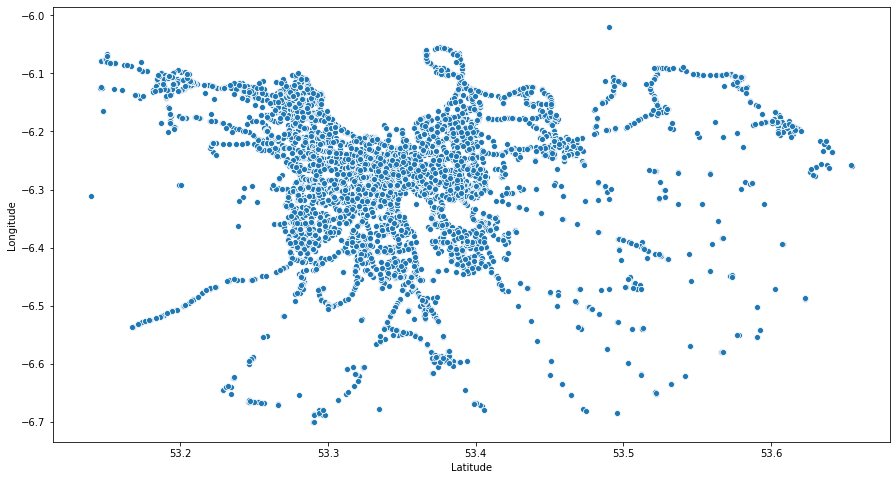

time: 156 ms (started: 2021-04-21 19:09:13 +01:00)


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(scatter_test["Latitude"], scatter_test["Longitude"])

Check on the map if it is working.

In [65]:
import folium

map_pickup = folium.Map( location=[53.347409, -6.272184])

blts_df.apply(lambda row:folium.Circle(location=[row["Latitude"], row["Longitude"]] ).add_to(map_pickup), axis=1)

map_pickup

map_pickup.save('map_pickup.html')

time: 3.14 s (started: 2021-04-21 19:09:16 +01:00)


_________________________________________

# Calculating what is around a coordinate.

- This took 29 hours to run, so not a good idea to run this cell now.
- It can be separated in many notebooks(separate the dataset in many parts) to run faster.
- Comments are straight into the code to make it easier to understand each line.

In [80]:
test_df = houses_df_test.head(1)

time: 0 ns (started: 2021-04-21 19:41:55 +01:00)


In [82]:
from geopy.distance import geodesic

#Create new dataframe.
df = pd.DataFrame(columns = ['ID', 'Luas_quantity', 'Bus_quantity','Train_quantity','PS_quantity','SS_quantity','Garda_quantity'])

#Loop through the properties dataset.
for label, row in houses_df_test.iterrows():
    #Set the counter variables.
    luas = 0
    bus = 0
    train = 0
    PS = 0
    SS = 0
    garda = 0
    
    #Loop through the blts dataset.
    for label1, row1 in blts_df.iterrows():
        #Calculate the distance from the property to the current blts row.
        distance_in_km = geodesic((row['Latitude'],row['Longitude']),(row1['Latitude'],row1['Longitude'])).km
        #Set if statements to add to counter if certain type and smaller or equal to 1km.
        if distance_in_km <= 1 and row1['Type'] == "Bus Stop":
            bus += 1
        
        elif distance_in_km <= 1 and row1['Type'] == "Luas Stop":
            luas += 1
            
            
        elif distance_in_km <= 1 and row1['Type'] == "Train Stop":
            train += 1
            
        elif distance_in_km <= 1 and row1['Type'] == "Primary School":
            PS += 1
            
        elif distance_in_km <= 1 and row1['Type'] == "Secondary School":
            SS += 1
        
        elif distance_in_km <= 1 and row1['Type'] == "Garda Station":
            garda += 1
            
            
    #Append in the end to our dataframe.
    df = df.append({'ID': row['ID'],'Luas_quantity': luas,'Bus_quantity':bus, 'Train_quantity':train, 'PS_quantity':PS,'SS_quantity':SS, 'Garda_quantity':garda}, ignore_index = True)

time: 1d 5h 20min 31s (started: 2021-04-21 19:43:25 +01:00)


- Dataframe resulted from the alghoritm above, it returned everything as float.

In [83]:
df

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity
0,0.0,0.0,32.0,0.0,1.0,0.0,0.0
1,1.0,0.0,32.0,0.0,1.0,0.0,0.0
2,2.0,0.0,34.0,0.0,1.0,0.0,0.0
3,3.0,0.0,32.0,0.0,1.0,0.0,0.0
4,4.0,0.0,33.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
46399,46399.0,0.0,49.0,1.0,5.0,0.0,0.0
46400,46400.0,4.0,64.0,0.0,5.0,2.0,0.0
46401,46401.0,0.0,39.0,1.0,3.0,1.0,0.0
46402,46402.0,6.0,49.0,0.0,3.0,1.0,0.0


time: 32 ms (started: 2021-04-23 01:03:57 +01:00)


- Saved the dataset to be sure in case something goes wrong and I am not around.

In [84]:
df.to_csv ('Data\processed_df.csv', index = False, header=True)

time: 250 ms (started: 2021-04-23 01:03:57 +01:00)


- Transform everything to int.

In [86]:
df = df.astype(int)

time: 0 ns (started: 2021-04-23 13:16:59 +01:00)


- Now the dataframe are all integers.

In [87]:
df

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity
0,0,0,32,0,1,0,0
1,1,0,32,0,1,0,0
2,2,0,34,0,1,0,0
3,3,0,32,0,1,0,0
4,4,0,33,0,1,0,0
...,...,...,...,...,...,...,...
46399,46399,0,49,1,5,0,0
46400,46400,4,64,0,5,2,0
46401,46401,0,39,1,3,1,0
46402,46402,6,49,0,3,1,0


time: 16 ms (started: 2021-04-23 13:17:03 +01:00)


# Creating the final_df (final dataset).

- Merge both houses_df and the resulting df into one.

In [88]:
final_df = pd.merge(df,houses_df)

time: 46 ms (started: 2021-04-23 13:18:05 +01:00)


Now we have our final dataset.

- Save the dataset.

In [95]:
final_df.to_csv('data/final_df.csv',index = False, header=True)

time: 297 ms (started: 2021-04-23 13:21:27 +01:00)


# Troubleshooting Code.

- Separating in 4 datasets and saving them to create 4 notebooks:

In [90]:
df1 = houses_df_test.iloc[0:11601]
df2 = houses_df_test.iloc[11601:23202]
df3 = houses_df_test.iloc[23202:34803]
df4 = houses_df_test.iloc[34803:46404]

time: 0 ns (started: 2021-04-25 19:36:42 +01:00)


In [95]:
df1
df1.to_csv('data/final/df1.csv',index = False, header=True)

time: 47 ms (started: 2021-04-25 19:38:40 +01:00)


In [96]:
df2
df2.to_csv('data/final/df2.csv',index = False, header=True)

time: 47 ms (started: 2021-04-25 19:38:59 +01:00)


In [97]:
df3
df3.to_csv('data/final/df3.csv',index = False, header=True)

time: 47 ms (started: 2021-04-25 19:39:06 +01:00)


In [98]:
df4
df4.to_csv('data/final/df4.csv',index = False, header=True)

time: 47 ms (started: 2021-04-25 19:39:23 +01:00)


- After merging them all together:

In [30]:
processed = pd.read_csv('Data/processed_df.csv')

time: 31 ms (started: 2021-04-29 11:58:18 +01:00)


In [31]:
processed

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity
0,0.0,0.0,32.0,0.0,1.0,0.0,0.0
1,1.0,0.0,32.0,0.0,1.0,0.0,0.0
2,2.0,0.0,34.0,0.0,1.0,0.0,0.0
3,3.0,0.0,32.0,0.0,1.0,0.0,0.0
4,4.0,0.0,33.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
46399,46399.0,0.0,49.0,1.0,5.0,0.0,0.0
46400,46400.0,4.0,64.0,0.0,5.0,2.0,0.0
46401,46401.0,0.0,39.0,1.0,3.0,1.0,0.0
46402,46402.0,6.0,49.0,0.0,3.0,1.0,0.0


time: 16 ms (started: 2021-04-29 11:58:20 +01:00)


Merging with the houses_df:

In [32]:
final_df = pd.merge(processed,houses_df)

time: 47 ms (started: 2021-04-29 11:58:32 +01:00)


In [33]:
final_df

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date of Sale,Postal Code,Price,Not Full Market Price,VAT Exclusive,Description of Property,Longitude,Latitude,Neighborhood
0,0.0,0.0,32.0,0.0,1.0,0.0,0.0,2017-01-01,Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
1,1.0,0.0,32.0,0.0,1.0,0.0,0.0,2017-01-01,Dublin 3,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
2,2.0,0.0,34.0,0.0,1.0,0.0,0.0,2017-01-01,Dublin 3,66000.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.182833,53.362984,Clontarf
3,3.0,0.0,32.0,0.0,1.0,0.0,0.0,2017-01-01,Dublin 3,271800.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710,Clontarf
4,4.0,0.0,33.0,0.0,1.0,0.0,0.0,2017-01-01,Dublin 3,830000.0,No,No,Second-Hand Dwelling house /Apartment,-6.181892,53.365139,Clontarf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399.0,0.0,49.0,1.0,5.0,0.0,0.0,2019-08-16,Dublin 5,320000.0,No,No,Second-Hand Dwelling house /Apartment,-6.212927,53.376221,Clontarf West
46400,46400.0,4.0,64.0,0.0,5.0,2.0,0.0,2019-08-16,Dublin 14,285000.0,No,No,Second-Hand Dwelling house /Apartment,-6.246034,53.294678,Churchtown Lower
46401,46401.0,0.0,39.0,1.0,3.0,1.0,0.0,2019-08-16,Dublin 13,215000.0,No,No,Second-Hand Dwelling house /Apartment,-6.156979,53.403250,Donaghmede
46402,46402.0,6.0,49.0,0.0,3.0,1.0,0.0,2019-08-16,Dublin 18,365000.0,No,No,Second-Hand Dwelling house /Apartment,-6.215124,53.277574,Blackthorn


time: 16 ms (started: 2021-04-29 11:58:35 +01:00)


In [34]:
final_df.to_csv('data/test_final_df.csv',index = False, header=True)

time: 484 ms (started: 2021-04-29 11:59:22 +01:00)
